In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/poll-responses.csv', index_col = 'Timestamp')

In [3]:
candidates = ['Eduardo A. Gonzalez ’18, with running mate Alex Popovski ’19', 
              'Scott Ely ’18, with running mate Evan M. Bonsall ’19', 
              'Yasmin Z. Sachee ’18, with running mate Cameron K. Khansarinia ’18',
              'Grant S. Solomon ’18, with running mate Alexander T. Moore ’18']
candidates_short = ['Eduardo', "Scott", "Yasmin", "Grant"]
years = ['Freshman', 'Sophomore', 'Junior', 'Senior']

In [4]:
voting = df[df['Are you planning to vote in the UC Election?'] == 'Yes']

In [5]:
year_breakdown = voting.groupby(voting['What year are you?']).count()['Are you planning to vote in the UC Election?']
year_breakdown = year_breakdown.reindex(years)
year_breakdown

What year are you?
Freshman     69
Sophomore    66
Junior       62
Senior       24
Name: Are you planning to vote in the UC Election?, dtype: int64

In [21]:
def plot_data (data, title, ylabel, color, xticks = candidates_short):
    fig = plt.figure(figsize = (20, 5))
    plt.bar(np.arange(0, 4), data, width = 1.0, color = color)
    plt.title(title)
    plt.xticks(np.arange(0.5, 4), xticks, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.ylim(0, max(data) + 5)
    plt.show()
    fig.savefig(title + ".jpg")

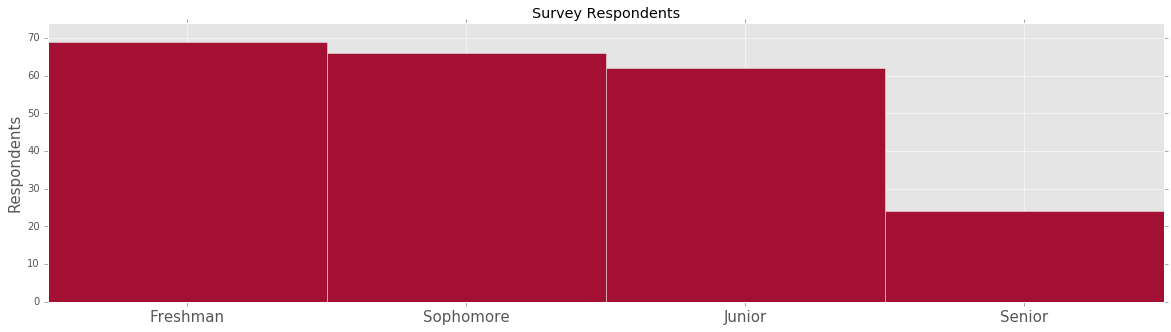

In [26]:
plot_data (year_breakdown.values, "Survey Respondents", "Respondents", '#A41034', years)

In [8]:
voting_breakdown = voting.groupby(voting['If yes, who are you planning to vote for?']).count().ix[::,0]
voting_breakdown = voting_breakdown.reindex(candidates)
voting_breakdown

If yes, who are you planning to vote for?
Eduardo A. Gonzalez ’18, with running mate Alex Popovski ’19          74
Scott Ely ’18, with running mate Evan M. Bonsall ’19                  59
Yasmin Z. Sachee ’18, with running mate Cameron K. Khansarinia ’18    80
Grant S. Solomon ’18, with running mate Alexander T. Moore ’18         6
Name: What year are you?, dtype: int64

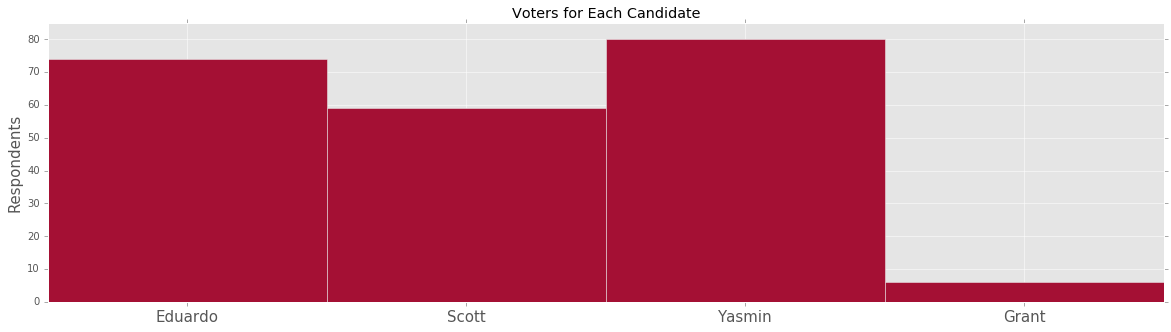

In [27]:
plot_data (voting_breakdown.values, "Voters for Each Candidate", "Respondents", '#A41034')

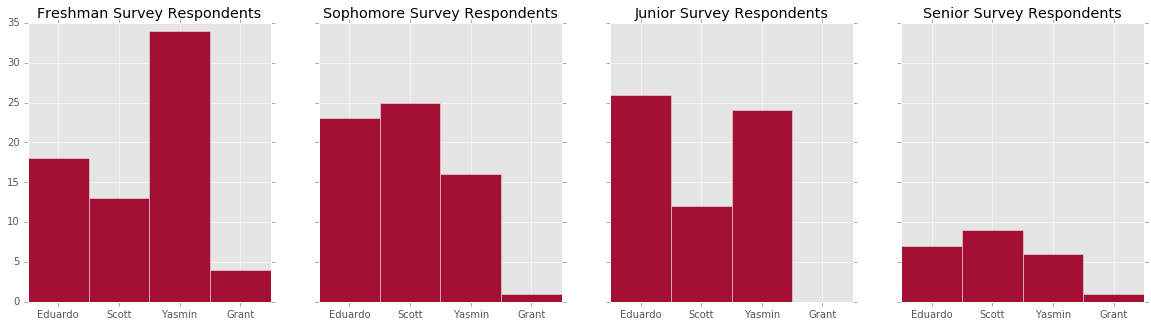

In [28]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5), sharex = True, sharey = True)
ax_ind = 0

for year in years:
    year_df = voting[voting['What year are you?'] == year]
    grouped = year_df.groupby(year_df['If yes, who are you planning to vote for?']).count()
    
    votes, vote_ind = np.zeros(4), 0
    
    for ticket in candidates:
        try:
            votes[vote_ind] = grouped.ix[::,0][ticket]
        except:
            votes[vote_ind] = 0
            
        vote_ind += 1
        
    ax[ax_ind].bar(np.arange(0, 4), votes, width = 1.0, color = '#A41034')
    ax[ax_ind].set_title(year + " Survey Respondents")
    plt.xticks(np.arange(0.5, 4), candidates_short)
    ax_ind += 1
fig.savefig("Voters for Each Candidate by Grade.jpg")

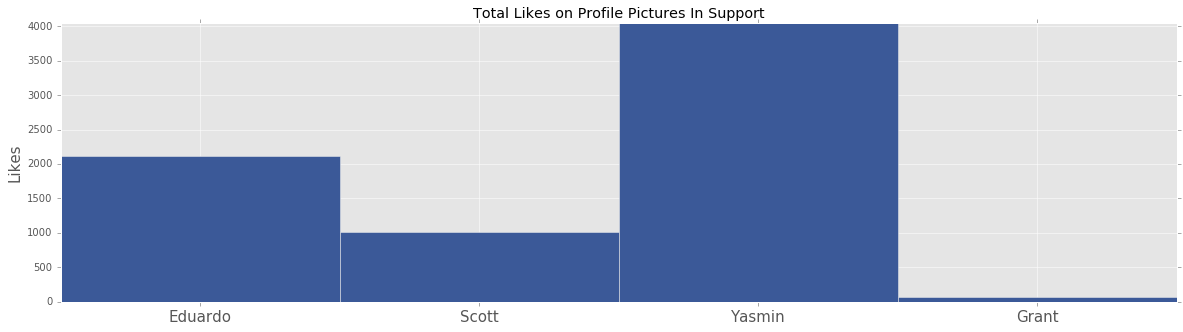

In [24]:
# Total sum of likes on profile pictures
likes = [2111, 1011, 4045, 67]

plot_data (likes, "Total Likes on Profile Pictures In Support", "Likes", '#3b5998')

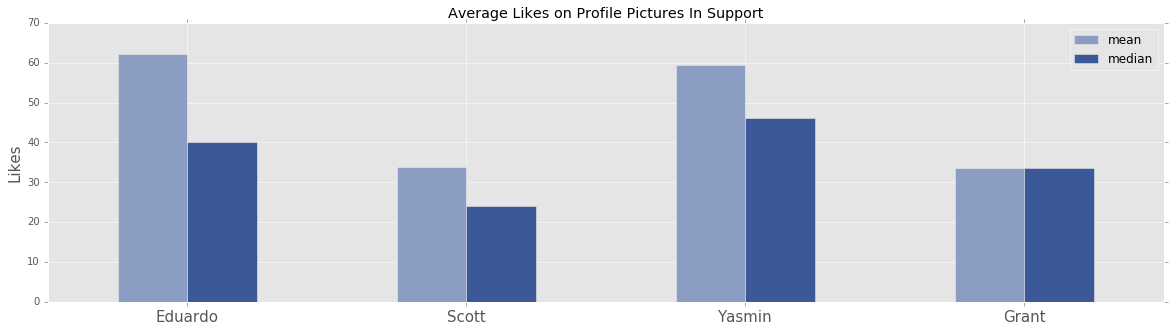

In [32]:
# Average number of likes
average = pd.DataFrame()
average['mean'] = [62.08823529, 33.7, 59.48529412, 33.5]
average['median'] = [40, 24, 46, 33.5]

ax = average.plot.bar(figsize = (20, 5), color = ['#8b9dc3', '#3b5998'])
fig = ax.get_figure()
plt.title("Average Likes on Profile Pictures In Support")
plt.xticks(np.arange(0, 4), candidates_short, rotation = 0)
plt.ylabel('Likes', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()
fig.savefig("Average Likes on Profile Pictures In Support.jpg")

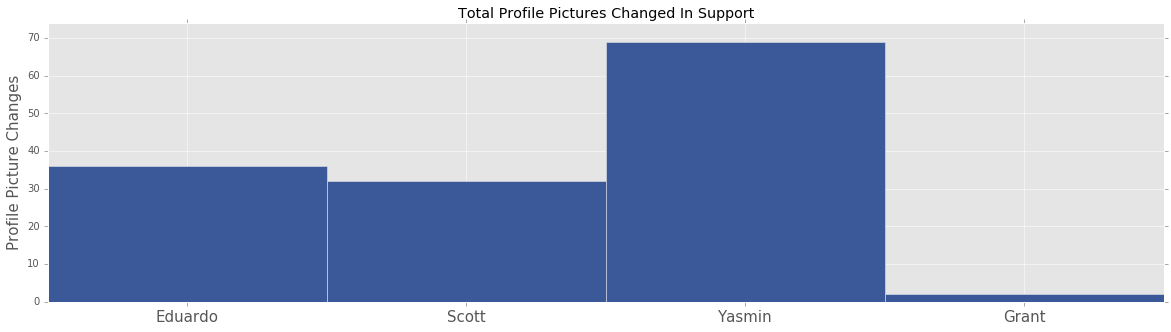

In [25]:
# Number of people who changed profile pictures
pro_pic_changes = [36, 32, 69, 2]
plot_data (pro_pic_changes, "Total Profile Pictures Changed In Support", "Profile Picture Changes", '#3b5998')

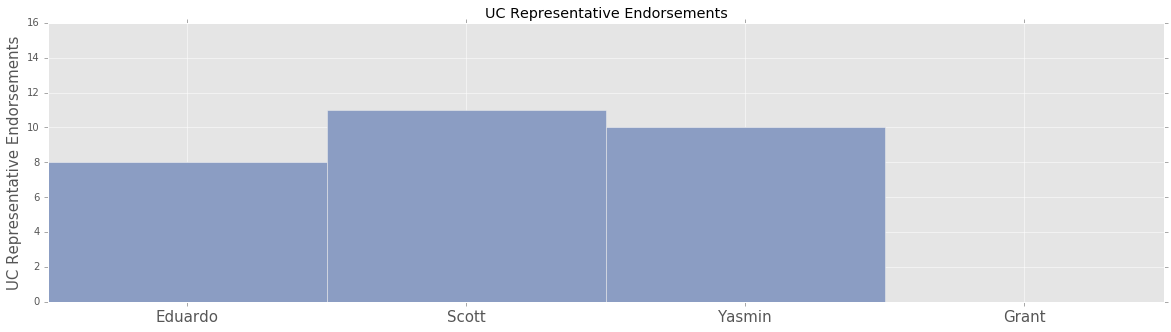

In [34]:
# UC Representative support
uc_likes = [8, 11, 10, 0]
plot_data (uc_likes, "UC Representative Endorsements", "UC Representative Endorsements", "#8b9dc3")

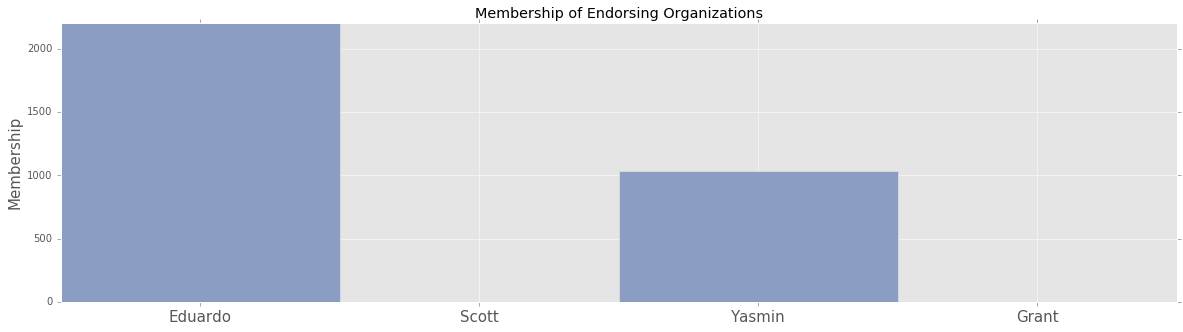

In [36]:
# Organization membership in support
org_likes = [2201, 0, 1032, 0]
plot_data (org_likes, "Membership of Endorsing Organizations", "Membership", "#8b9dc3")